# Лобораторная работа 1.
## Перевозчиков Г. П. 405гр.

In [1]:
import math

### Задание параметрив варианта

In [2]:
n = 11
b = 1
phi1 = 0.0001
phi2 = 1
phi4 = 0.0001
phi5 = 1
alfa1 = 0.1
alfa2 = 0
alfa3 = 0

def f_3(x):
    return x+math.sin(math.pi*x)

def f_1(t):
    return 0

def f_2(t):
    return 1

def f(t, x):
    return 0

def u(t, x):
    return x+math.exp(-1*math.pi**2*alfa1*t)*math.sin(math.pi*x)

### Начальная инициализация

In [3]:
U = [[0] * n for i in range(n)]
X = [0 * n for i in range(n)]
U_p = [0 * n for i in range(n)]
h = b/10
h_t = (h**2)/2
t_end = h_t*10

### 1. Явная схема

In [4]:
x=0
t=0
for j in range(n):
    U[0][j]=f_3(x)
    X[j]=x
    x=x+h

In [5]:
for i in range(1, n):
    t = t+h_t
    for j in range(1, n-1):
        U[i][j]=(((alfa1*h_t)/(h**2))-((alfa2*h_t)/(2*h)))*U[i-1][j-1]+(h_t*alfa3+1-((2*alfa1*h_t)/(h**2)))*U[i-1][j]+((alfa1*h_t)/(h**2)+(alfa2*h_t)/(2*h))*U[i-1][j+1]+h_t*f(t,X[i])

    U[i][1]=(2*h*f_1(t)-4*phi1*U[i][1]+phi1*U[i][2])/(2*h*phi2-3*phi1)
    U[i][10]=(2*h*f_2(t)+4*phi4*U[i][9]-phi4*U[i][8])/(2*h*phi5+3*phi4)

In [6]:
for i in range(n):
    U_p[i] = U[10][i]
x_a = 0
X_a = [0 * n for i in range(n)]
U_a = [0 * n for i in range(n)]
t = 0
for i in range(n):
    t = t + h_t
    X_a[i] = x_a
    U_a[i] = u(t, x_a)
    x_a=x_a+h

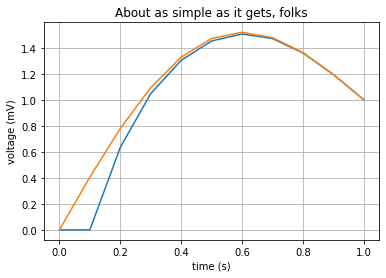

In [7]:
import matplotlib
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(X,U_p,X_a,U_a)

ax.set(xlabel='time (s)', ylabel='voltage (mV)',
       title='About as simple as it gets, folks')
ax.grid()

plt.show()

In [8]:
E_1=[0 * n for i in range(n)]
for i in range(n):
    E_1[i]=abs(U_a[i]-U_p[i])

### 2. Неявняю схема

In [9]:
x=0
t=0
for j in range(n):
    U[0][j]=f_3(x)
    X[j]=x
    x=x+h

In [10]:
for i in range(1, n):
    M = [[0] * n for i in range(n)]
    N = [0 * n for i in range(n)]
    P = [0 * n for i in range(n)]
    Q = [0 * n for i in range(n)]
    t = t+h_t
    for j in range(1, n-1):
        M[j][j-1]= (2*alfa1-h*alfa2)*(h_t/(2*(h**2)))
        M[j][j]=alfa3*h_t-((2*alfa1*h_t)/(h**2))-1
        M[j][j+1]= (2*alfa1+h*alfa2)*(h_t/(2*(h**2)))
        N[j]=-1*U[i-1][j]-h_t*f(t, X[j])
    M[0][0]=(((2*alfa1)/h)+(h/h_t)-(alfa3*h)-((phi2/phi1)*(2*alfa1-alfa2*h)))
    M[0][1]=-(2*alfa1)/h
    M[10][9]=-1*(2*alfa1)/h
    M[10][9]=(((2*alfa1)/h)+(h/h_t)-(alfa3*h)+((phi5/phi4)*(2*alfa1+alfa2*h)))
    N[0]=(h*f(t,X[0])+(h/h_t)*U[i-1][0])-((2*alfa1-alfa2*h)/phi1)*f_1(t)
    N[10]=(h*f(t,X[10])+(h/h_t)*U[i-1][10])+((2*alfa1+alfa2*h)/phi4)*f_2(t)
    P[0]=-1*M[0][1]/M[0][0]
    Q[0]=N[0]/M[0][0]
    for j in range(1, n-1):
        P[j]=-1*M[j][j+1]/(M[j][j]+M[j][j-1]*P[j-1])
        Q[j]=(N[j]-M[j][j-1]*Q[j-1])/(M[j][j]+M[j][j-1]*P[j-1])
    P[10]=0
    Q[10]=(N[10]-M[10][9]*Q[9])/(M[10][10]+M[10][9]*P[9])
    U[i][10]=Q[10]

    for j in range(1, n-1):
        U[i][10-j]=Q[10-j]+P[11-j]*Q[10-j+1]

In [11]:
for i in range(n):
    U_p[i] = U[10][i]

# fix devision by zero
U_p[10] = U_p[10]*0.1

x_a = 0
X_a = [0 * n for i in range(n)]
U_a = [0 * n for i in range(n)]
t = 0
for i in range(n):
    t = t + h_t
    X_a[i] = x_a
    U_a[i] = u(t, x_a)
    x_a=x_a+h

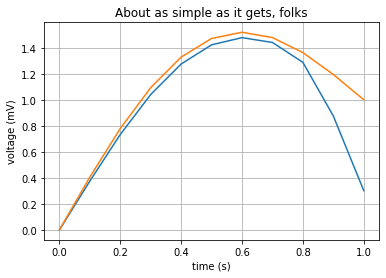

In [12]:
fig, ax = plt.subplots()
ax.plot(X,U_p,X_a,U_a)

ax.set(xlabel='time (s)', ylabel='voltage (mV)',
       title='About as simple as it gets, folks')
ax.grid()

plt.show()

In [13]:
E_2=[0 * n for i in range(n)]
for i in range(n):
    E_2[i]=abs(U_a[i]-U_p[i])

### 3. Схема Кранка-Николона

In [14]:
x=0
t=0
for j in range(n):
    U[0][j]=f_3(x)
    X[j]=x
    x=x+h

In [15]:
for i in range(1,n):
    M = [[0] * n for i in range(n)]
    N = [0 * n for i in range(n)]
    P = [0 * n for i in range(n)]
    Q = [0 * n for i in range(n)]
    t = t+h_t
    for j in range(1, n-1):
        M[j][j-1]=(2*alfa1-h*alfa2)*((h_t*0.5)/(2*h**2))
        M[j][j]=alfa3*h_t*0.5-((2*alfa1*h_t*0.5)/(h**2))-1
        M[j][j+1]=(2*alfa1+h*alfa2)*((h_t*0.5)/(2*h**2))
        N[j]=-1*U[i-1][j]-h_t*0.5*f(t,X[j])-0.5*((alfa1*h_t)*((U[i-1][j+1]-2*U[i-1][j]+U[i-1][j-1])/(h**2))+(alfa2*h_t)*((U[i-1][j+1]-U[i-1][j-1])/(2*h))+alfa3*h_t*U[i-1][j]+h_t*f(t-h_t,X[j]))
    M[0][0]=((2*alfa1)/h+h/h_t-alfa3*h-((phi2/phi1)*(2*alfa1-alfa2*h)))
    M[0][1]=(-2*alfa1)/h
    M[10][9]=(-2*alfa1)/h
    M[10][10]=((2*alfa1)/h+h/h_t-alfa3*h+((phi5/phi4)*(2*alfa1+alfa2*h)))
    N[0]=h*f(t,X[0])+((h/h_t)*U[i-1][0])-((2*alfa1-alfa2*h)/phi1)*f_1(t)
    N[10]=h*f(t,X[10])+(h/h_t)*U[i-1][10]+((2*alfa1+alfa2*h)/phi4)*f_2(t)

    P[0]=-1*M[0][1]/M[0][0]
    Q[0]=N[0]/M[0][0]
    for j in range(1, n-1):
        P[j]=-M[j][j+1]/(M[j][j]+M[j][j-1]*P[j-1])
        Q[j]=(N[j]-M[j][j-1]*Q[j-1])/(M[j][j]+M[j][-1]*P[j-1])
    P[10]=0
    Q[10]=(N[10]-M[10][9]*Q[9])/(M[10][10]+M[10][9]*P[9])
    U[i][10]=Q[10]
    for j in range(1, n-1):
        U[i][10-j]=Q[10-j]+P[10-j]*Q[10-j+1]

In [16]:
for i in range(n):
    U_p[i] = U[10][i]

x_a = 0
X_a = [0 * n for i in range(n)]
U_a = [0 * n for i in range(n)]
t = 0
for i in range(n):
    t = t + h_t
    X_a[i] = x_a
    U_a[i] = u(t, x_a)
    x_a=x_a+h

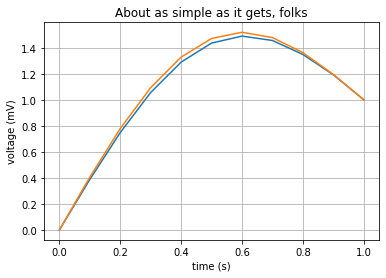

In [17]:
fig, ax = plt.subplots()
ax.plot(X,U_p,X_a,U_a)

ax.set(xlabel='time (s)', ylabel='voltage (mV)',
       title='About as simple as it gets, folks')
ax.grid()

plt.show()

In [18]:
E_3=[0 * n for i in range(n)]
for i in range(n):
    E_3[i]=abs(U_a[i]-U_p[i])

### Погрешности

In [19]:
print('|       |','|  absolute |','|  absolute |','|  absolute |')
print('|   x   |','|   error   |','|   error   |','|   error   |')
print('|       |','| "explict" |','| "implict" |','| "exp-imp" |')
print('|=======|','|===========|','|===========|','|===========|')
for i in range(n):
    print('|{:6.5f}| |{:10.9f}| |{:10.9f}| |{:10.9f}|'.format(X[i], E_1[i], E_2[i], E_3[i]))

|       | |  absolute | |  absolute | |  absolute |
|   x   | |   error   | |   error   | |   error   |
|       | | "explict" | | "implict" | | "exp-imp" |
|=======| |===========| |===========| |===========|
|0.00000| |0.000000000| |0.000000000| |0.000000000|
|0.10000| |0.405729658| |0.030642125| |0.017781192|
|0.20000| |0.144817194| |0.045721112| |0.030724348|
|0.30000| |0.046043810| |0.052527503| |0.037104166|
|0.40000| |0.025071194| |0.053111148| |0.038250472|
|0.50000| |0.018917618| |0.048775734| |0.035262579|
|0.60000| |0.013255355| |0.041475356| |0.029488147|
|0.70000| |0.007417764| |0.037581100| |0.022349043|
|0.80000| |0.002596149| |0.074964767| |0.014320322|
|0.90000| |0.000150973| |0.319053561| |0.001978912|
|1.00000| |0.000208437| |0.698569622| |0.000191985|
